In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c "titanic"
! unzip titanic.zip -d titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 28.3MB/s]
Archive:  titanic.zip
  inflating: titanic/gender_submission.csv  
  inflating: titanic/test.csv        
  inflating: titanic/train.csv       


In [ ]:
# ! kaggle competitions list
# ! kaggle datasets list

In [ ]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
cm = sns.light_palette("green", as_cmap=True)


In [ ]:
paths = os.listdir('/content/titanic')

test = pd.merge(pd.read_csv(f'/content/titanic/test.csv'),pd.read_csv(f'/content/titanic/gender_submission.csv'),right_on='PassengerId',left_on='PassengerId')
train = pd.read_csv(f'/content/titanic/train.csv')
df = pd.concat([train,test],axis=0).set_index('PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df[df.Name.str.contains('Isi')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
987,0,3,"Tenglin, Mr. Gunnar Isidor",male,25.0,0,0,350033,7.7958,NaN,S
1006,1,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.0,1,0,PC 17483,221.7792,C55 C57,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


<ipython-input-11-5c9ecbe61999>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(color='#7ABF23',ax=ax);


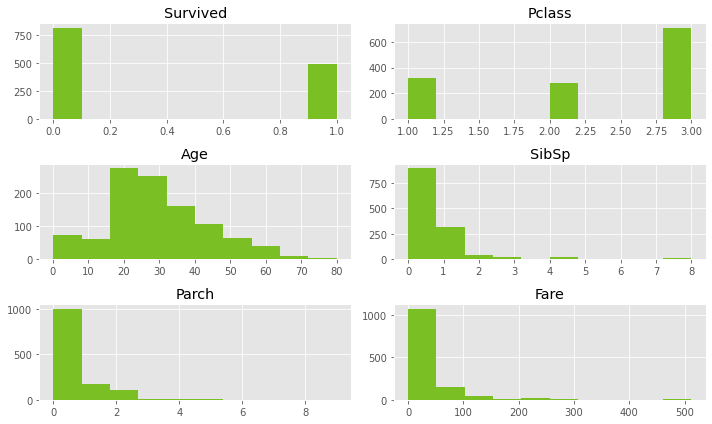

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
df.hist(color='#7ABF23',ax=ax);
fig.tight_layout();

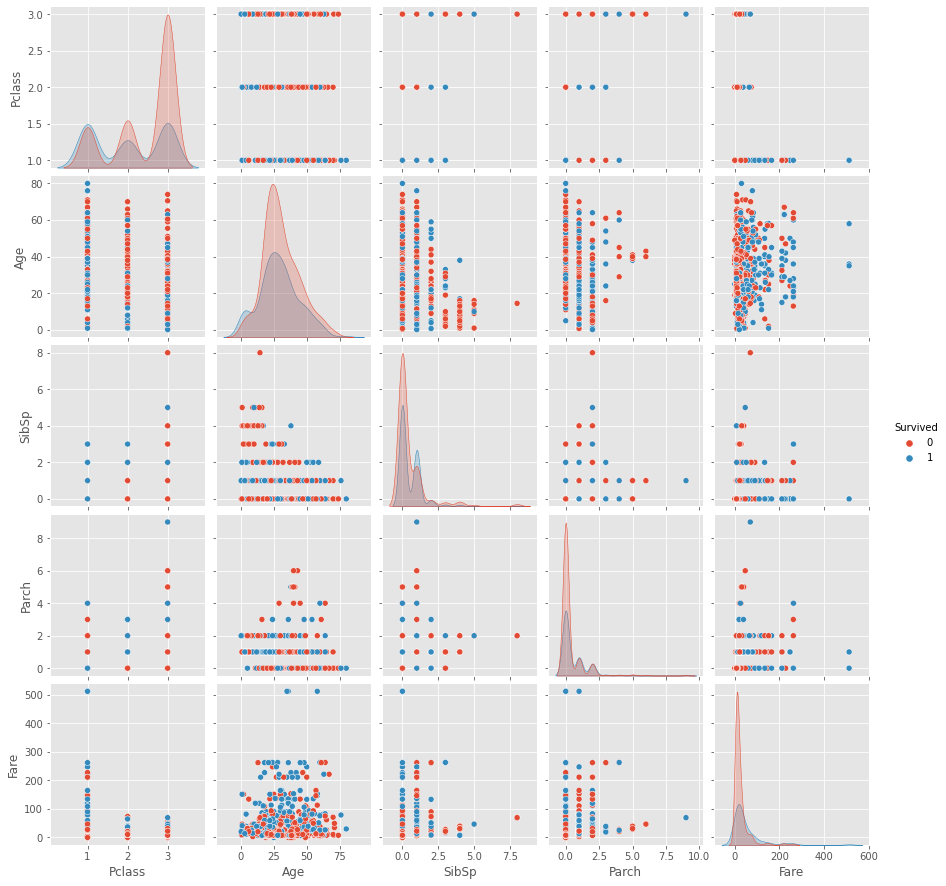

In [ ]:
sns.pairplot(df,hue='Survived')

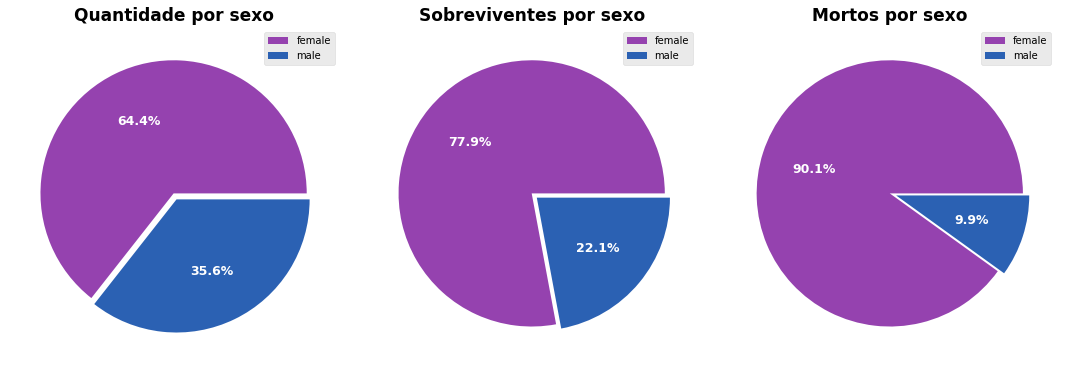

In [ ]:
lista = ['female','male']
explode1 = (0, 0.05)

fig, ax = plt.subplots(1,3,figsize=(15,9))

_, _, autopcts = ax[0].pie(df.Sex.value_counts(),colors=['#9542AF','#2B61B3'],explode= explode1, labels = lista, autopct='%1.1f%%', textprops = dict(color='w'))
plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':12.5})
ax[0].set_title('Quantidade por sexo', fontsize= 17,fontweight='bold')
ax[0].legend()

_, _, autopcts = ax[1].pie(df[df['Survived'] == 1].Sex.value_counts(),colors=['#9542AF','#2B61B3'],explode= explode1, labels = lista, autopct='%1.1f%%', textprops = dict(color='w'))
plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':12.5})
ax[1].set_title('Sobreviventes por sexo', fontsize= 17,fontweight='bold')
ax[1].legend()

_, _, autopcts = ax[2].pie(df[df['Survived'] == 0].Sex.value_counts(),colors=['#9542AF','#2B61B3'],explode= explode1, labels = lista, autopct='%1.1f%%', textprops = dict(color='w'))
plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':12.5})
ax[2].set_title('Mortos por sexo', fontsize= 17,fontweight='bold')
ax[2].legend()

fig.tight_layout()

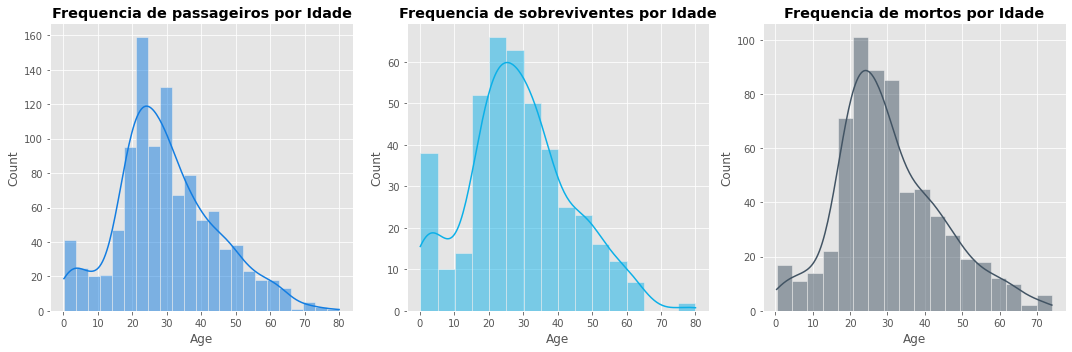

In [ ]:
from scipy.stats import norm
fig, ax  =  plt.subplots(1,3,figsize=(15,5))

ax[0].set_title("Frequencia de passageiros por Idade",fontweight='bold')
sns.histplot(df.Age,kde=True,ax=ax[0],color='#137DE1')

ax[1].set_title("Frequencia de sobreviventes por Idade",fontweight='bold')
sns.histplot(df[df['Survived'] == 1].Age,kde=True,ax=ax[1],color='#0CB0E8')

ax[2].set_title("Frequencia de mortos por Idade",fontweight='bold');
sns.histplot(df[df['Survived'] == 0].Age,kde=True,ax=ax[2],color='#425464')

fig.tight_layout()

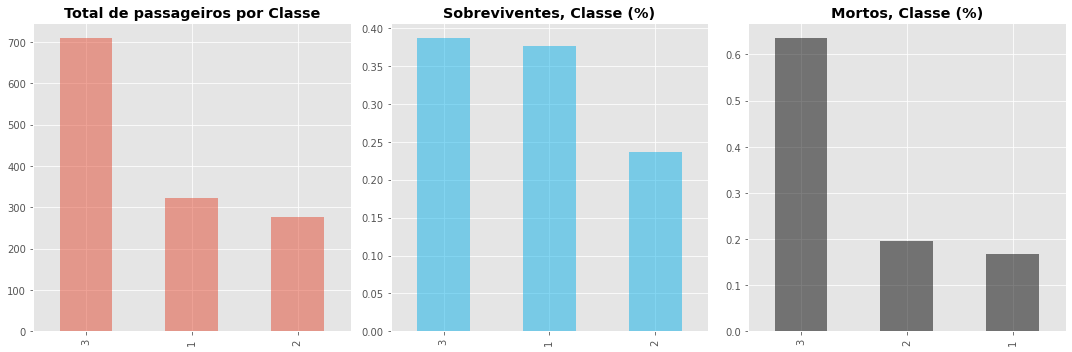

In [ ]:
fig, ax  =  plt.subplots(1,3,figsize=(15,5))

ax[0].set_title("Total de passageiros por Classe",fontweight='bold')
df.Pclass.value_counts().plot.bar(ax=ax[0],alpha=0.5);
ax[1].set_title("Sobreviventes, Classe (%)",fontweight='bold')
df[df['Survived'] == 1].Pclass.value_counts(normalize=True).plot.bar(ax=ax[1],color='#0CB0E8',alpha=0.5)
ax[2].set_title("Mortos, Classe (%)",fontweight='bold')
df[df['Survived'] == 0].Pclass.value_counts(normalize=True).plot.bar(ax=ax[2],color='#000000',alpha=0.5)
fig.tight_layout()

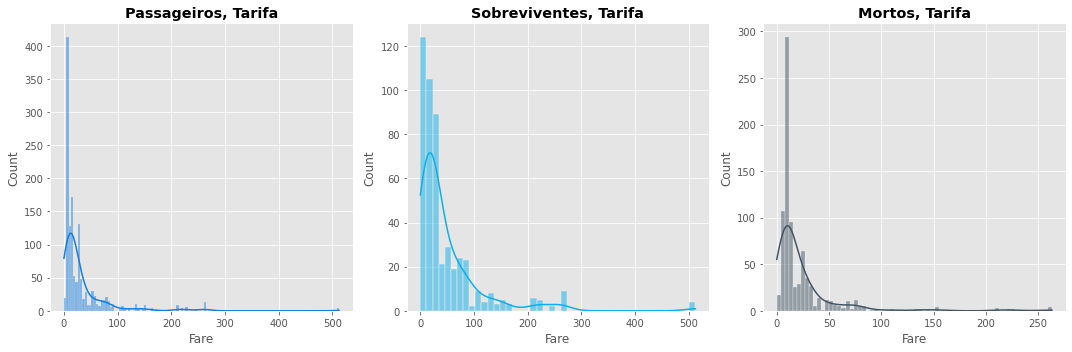

In [ ]:
fig, ax  =  plt.subplots(1,3,figsize=(15,5))

ax[0].set_title("Passageiros, Tarifa",fontweight='bold')
sns.histplot(df.Fare,kde=True,ax=ax[0],color='#137DE1')

ax[1].set_title("Sobreviventes, Tarifa",fontweight='bold')
sns.histplot(df[df['Survived'] == 1].Fare,kde=True,ax=ax[1],color='#0CB0E8')

ax[2].set_title("Mortos, Tarifa",fontweight='bold');
sns.histplot(df[df['Survived'] == 0].Fare,kde=True,ax=ax[2],color='#425464')

fig.tight_layout()

In [ ]:
df.corr('spearman').style.background_gradient(cmap=cm)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.262977,-0.041483,0.108273,0.165864,0.285094
Pclass,-0.262977,1.000000,-0.395892,-0.066679,-0.028752,-0.709019
Age,-0.041483,-0.395892,1.000000,-0.129929,-0.216097,0.192676
SibSp,0.108273,-0.066679,-0.129929,1.000000,0.438373,0.445566
Parch,0.165864,-0.028752,-0.216097,0.438373,1.000000,0.400301
Fare,0.285094,-0.709019,0.192676,0.445566,0.400301,1.000000


# **Modelo**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
df.isna().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [ ]:
df.drop('Name',inplace=True,axis=1)
df.drop('Cabin',inplace=True,axis=1)
df.dropna(subset=['Age'],inplace=True)
df.dropna(subset=['Fare'],inplace=True)


In [ ]:
le = LabelEncoder()
df['Ticket'] = le.fit_transform(df['Ticket'])
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])


In [ ]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,554,7.2500,2
2,1,1,0,38.0,1,0,638,71.2833,0
3,1,3,0,26.0,0,0,718,7.9250,2


In [ ]:
mask = df.columns.str.contains('Survived')
x_train,x_test,y_train,y_test = train_test_split(df.loc[:,~mask],df.loc[:,mask],test_size=0.2)

In [ ]:
clf = LogisticRegression(solver='lbfgs', max_iter=150)
clf.fit(x_train, y_train.values.ravel())

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=150)

In [ ]:
y_hat = clf.predict(x_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       123
           1       0.81      0.71      0.76        86

    accuracy                           0.81       209
   macro avg       0.81      0.80      0.80       209
weighted avg       0.81      0.81      0.81       209

